# Exploratory Data Analysis with Titanic dataset




### Importing necessary Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

### Loading the Data

In [77]:
df = pd.read_csv("data/train_titanic.csv")
df.sample(10)

# "S" stands for Southampton, "C" for Cherbourg, and "Q" for Queenstown

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,NaN,S
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S


In [78]:
datadict = pd.DataFrame(df.dtypes)
datadict = datadict.rename(columns={0:'DataType'})
datadict['MissingVal'] = df.isnull().sum()
datadict['NUnique']=df.nunique()
datadict['Count']=df.count()
datadict

,DataType,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<Axes: >

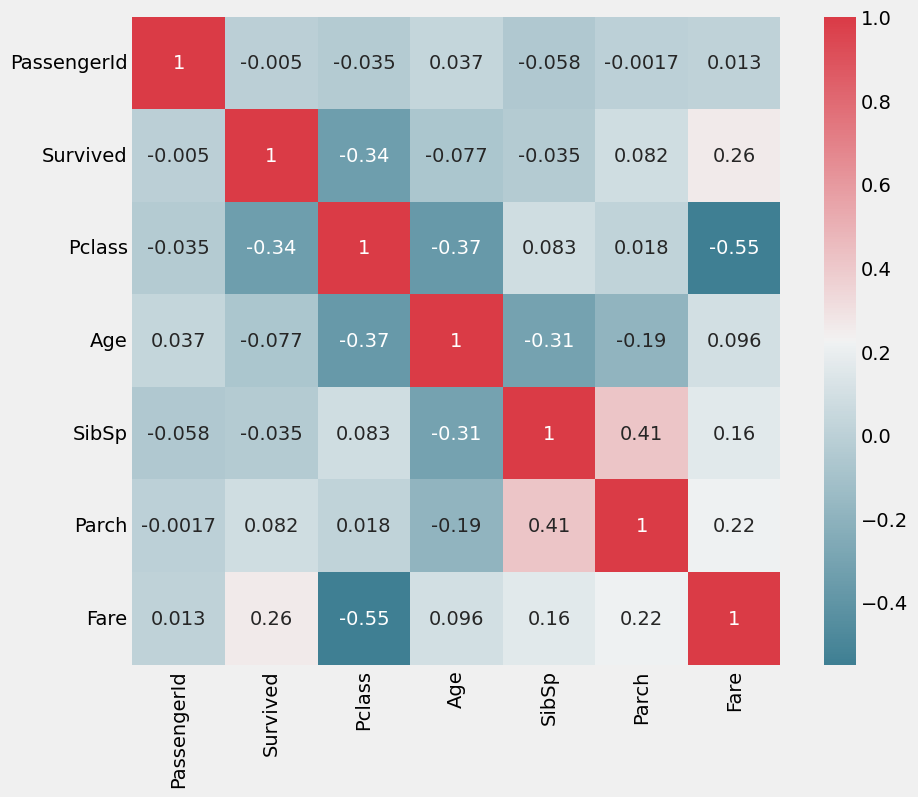

In [83]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.select_dtypes("number").corr()
sns.heatmap(
    corr,
    mask=np.zeros_like(corr),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
    annot=True,
    ax=ax,
)

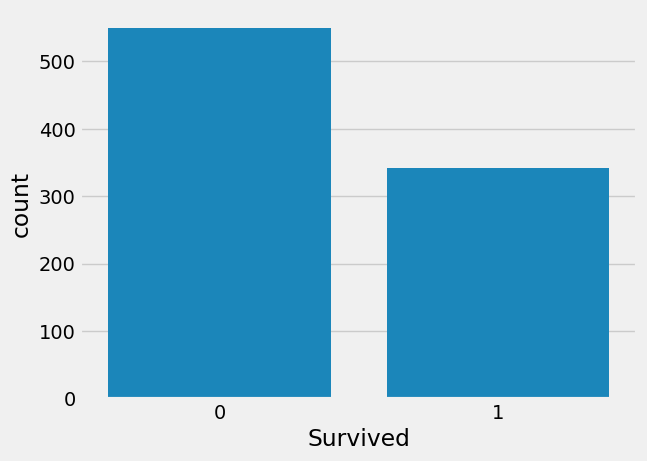

In [84]:
sns.countplot(x ='Survived' ,data=df)
plt.show()

From the above graph it is clear that not many persons survived.
Out of 891 persons in training dataset only 350, 38.4% of total training dataset survived. We will get more insight of data by exploring more.

Here we'll explore features

<Axes: xlabel='Age', ylabel='Count'>

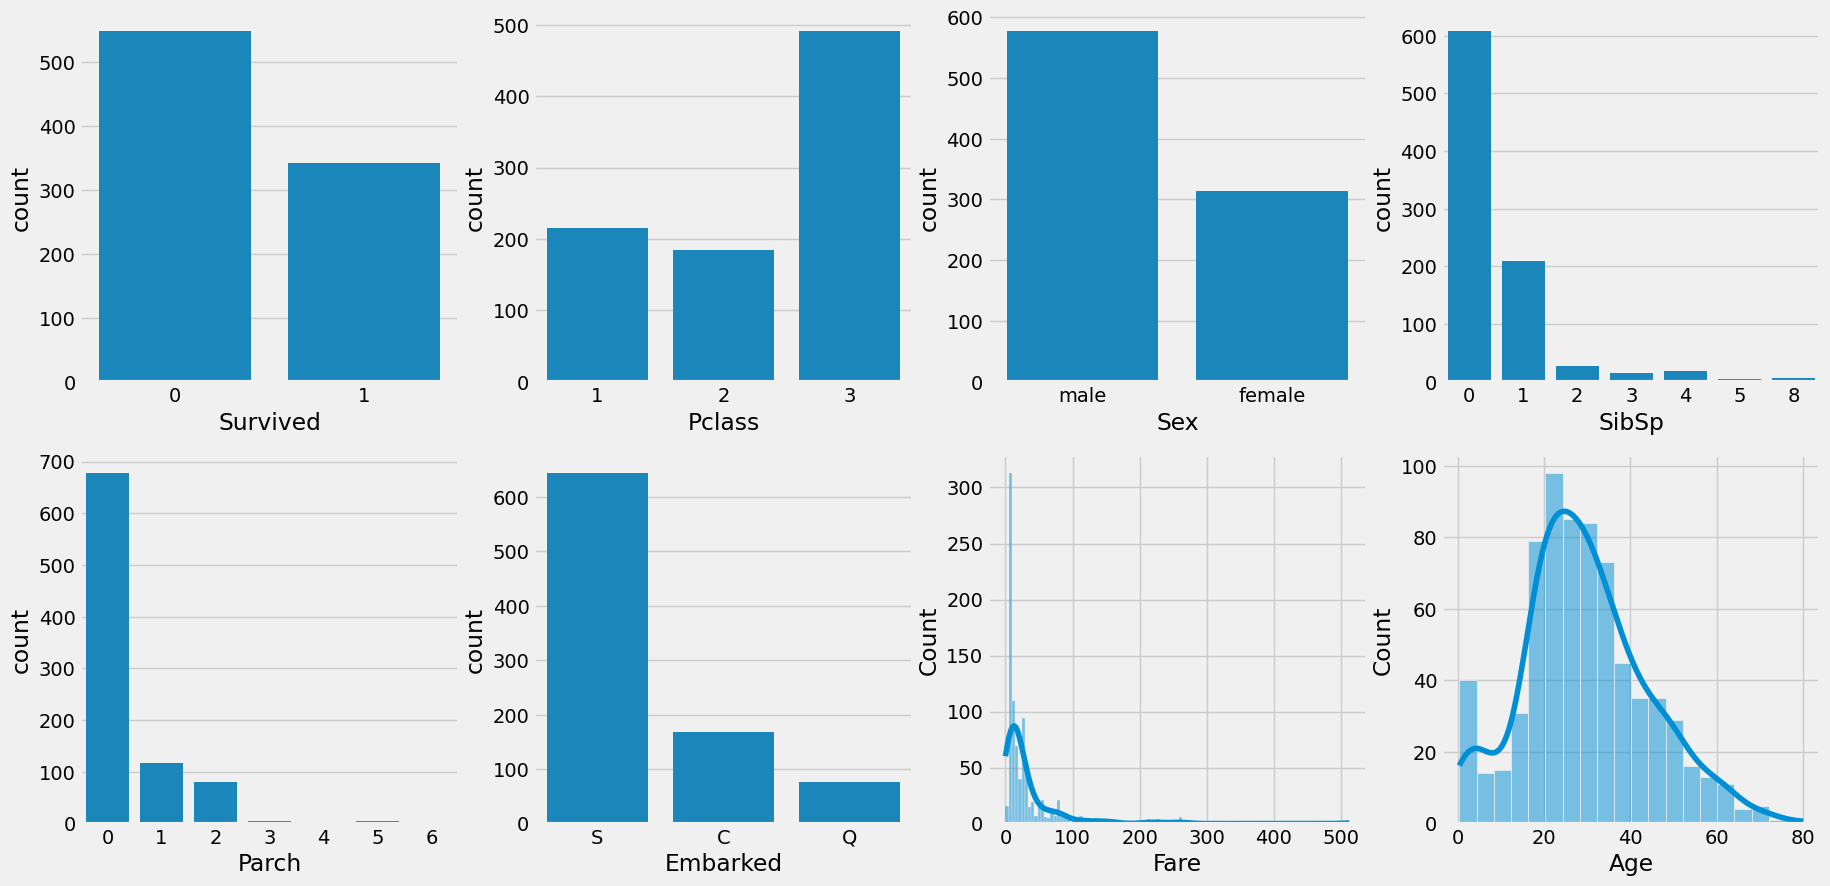

In [85]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
sns.countplot(x='Survived',data=df,ax=axes[0,0])
sns.countplot(x='Pclass',data=df,ax=axes[0,1])
sns.countplot(x='Sex',data=df,ax=axes[0,2])
sns.countplot(x='SibSp',data=df,ax=axes[0,3])
sns.countplot(x='Parch',data=df,ax=axes[1,0])
sns.countplot(x='Embarked',data=df,ax=axes[1,1])
sns.histplot(x=df['Fare'], kde=True,ax=axes[1,2])
sns.histplot(x=df['Age'].dropna(),kde=True,ax=axes[1,3])

<Axes: xlabel='Survived', ylabel='Fare'>

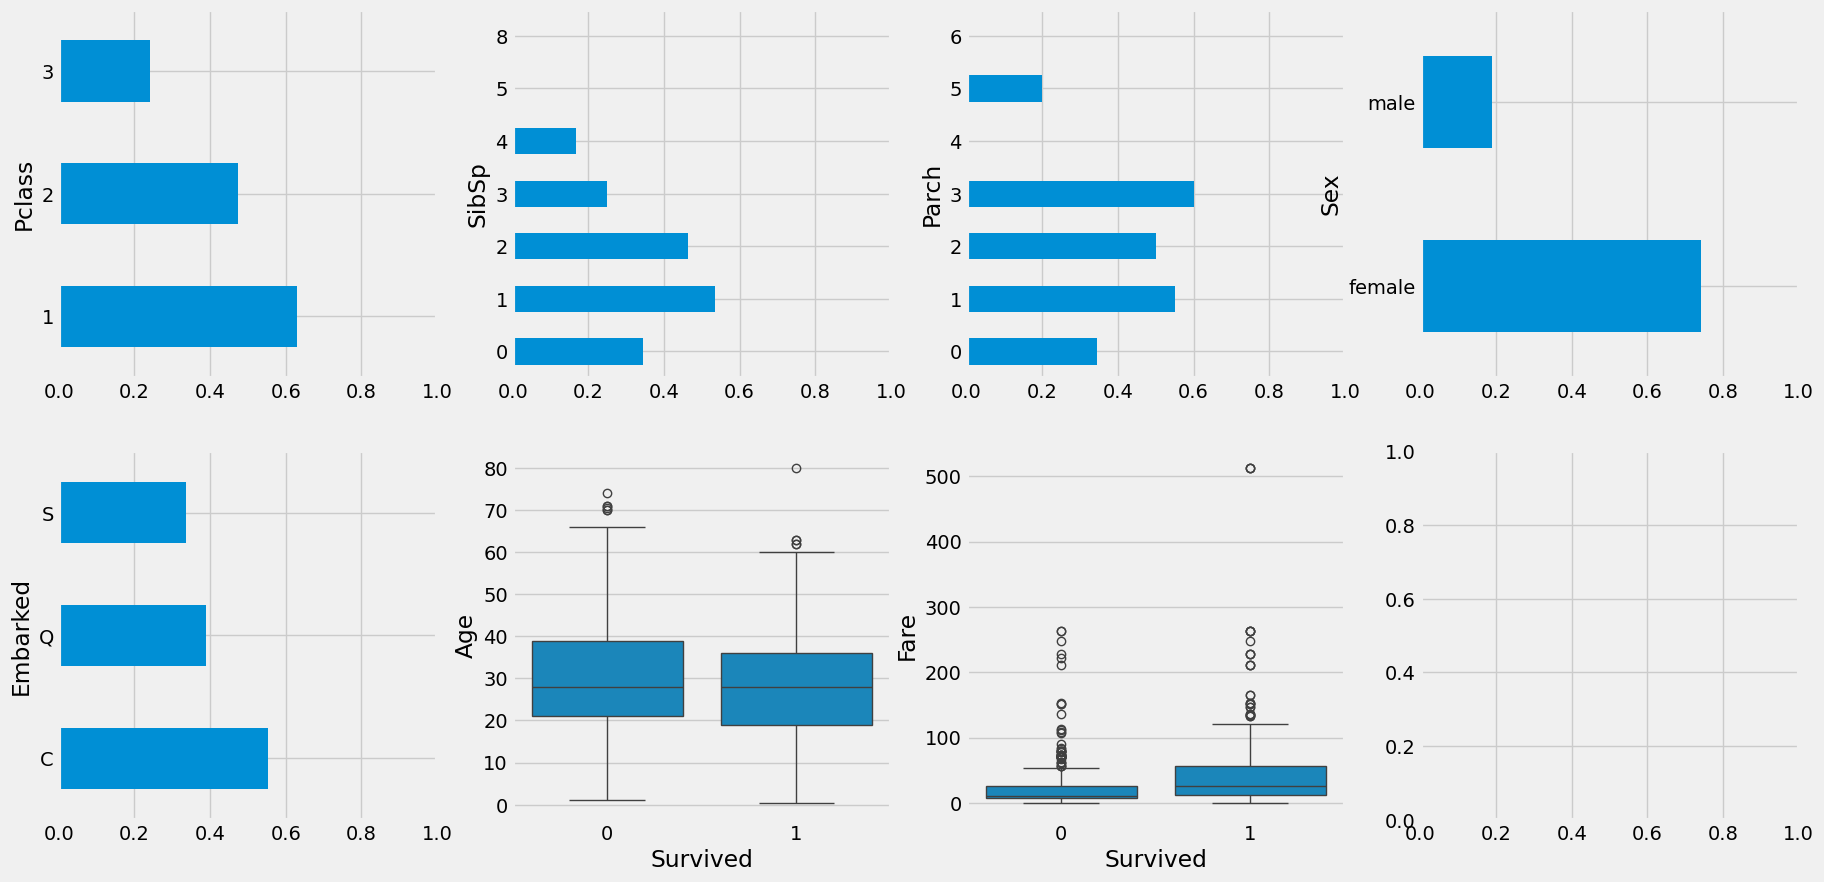

In [86]:
figbi, axesbi = plt.subplots(2, 4, figsize=(20, 10))
df.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
df.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
df.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
df.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
df.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=df,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=df,ax=axesbi[1,2])

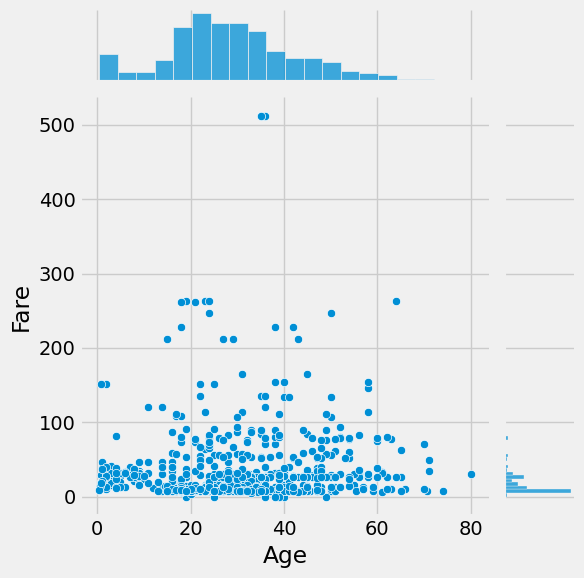

In [87]:
sns.jointplot(x="Age", y="Fare", data=df);

In [88]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

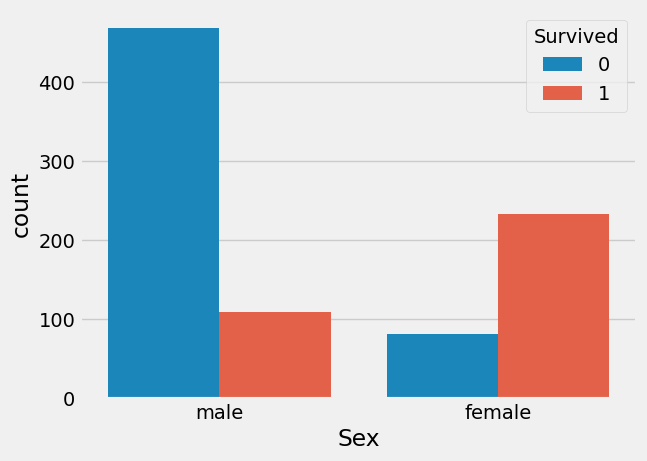

In [89]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

In [90]:
df.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

It is clear that 233 female survived out of 344. And out of 577 male 109 survived. The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

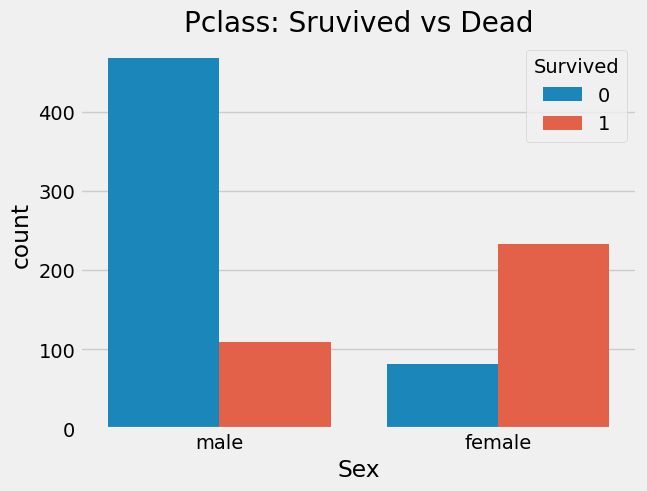

In [91]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Pclass: Sruvived vs Dead")
plt.show()

'Sex' is very interesting feature. Isn't it? Let's explore more features

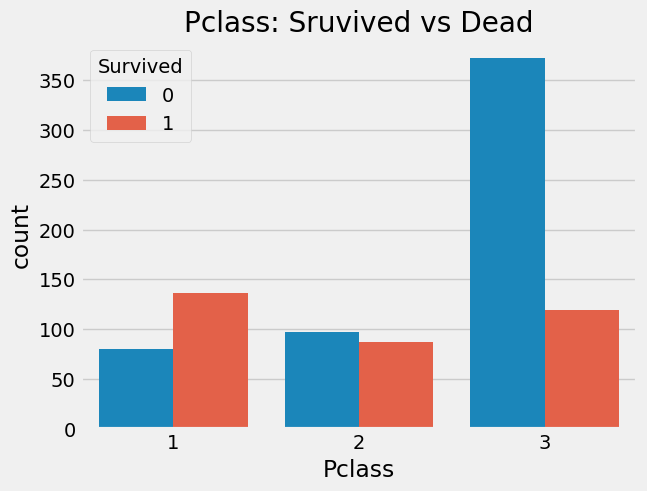

In [92]:
sns.countplot(x = 'Pclass', hue='Survived', data=df)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

# Wow.... That looks amazing. It is usually said that Money can't buy Everything, 
# But it is clearly seen that pasangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. In Class 2, survivail and non-survival rate is 49% and 51% approx.
# While in Class 1 almost 68% people survived. So money and status matters here.

# Let's dive in again into data to check more interesting observations.

In [93]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

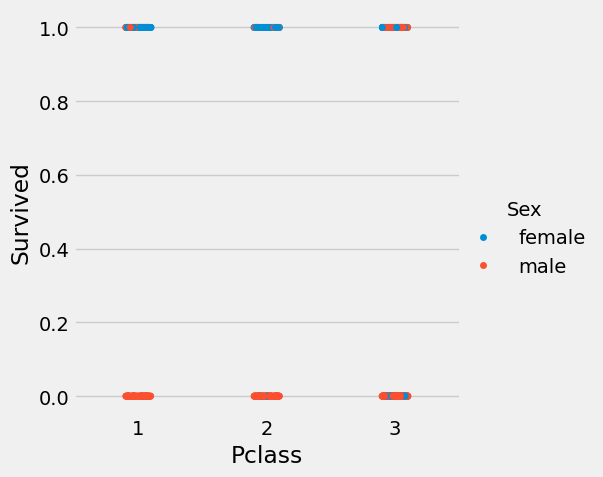

In [94]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df)  # catplot  kind='point'
plt.show()

### From the above plot it is clear that women survival rate in Class 1 is about 95-96%, as only 3 out of 94 women died. So, it is now more clear that irrespective of Class, women are given first priority during Rescue. Because survival rate for men in even Class 1 is also very low.
###   From this conclusion, PClass is also a important feature.

In [95]:
print('Oldest person Survived was of:',df[df['Survived']==1]['Age'].max())
print('Youngest person Survived was of:',df[df['Survived']==1]['Age'].min())
print('Average person Survived was of:',df[df['Survived']==1]['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 28.343689655172415


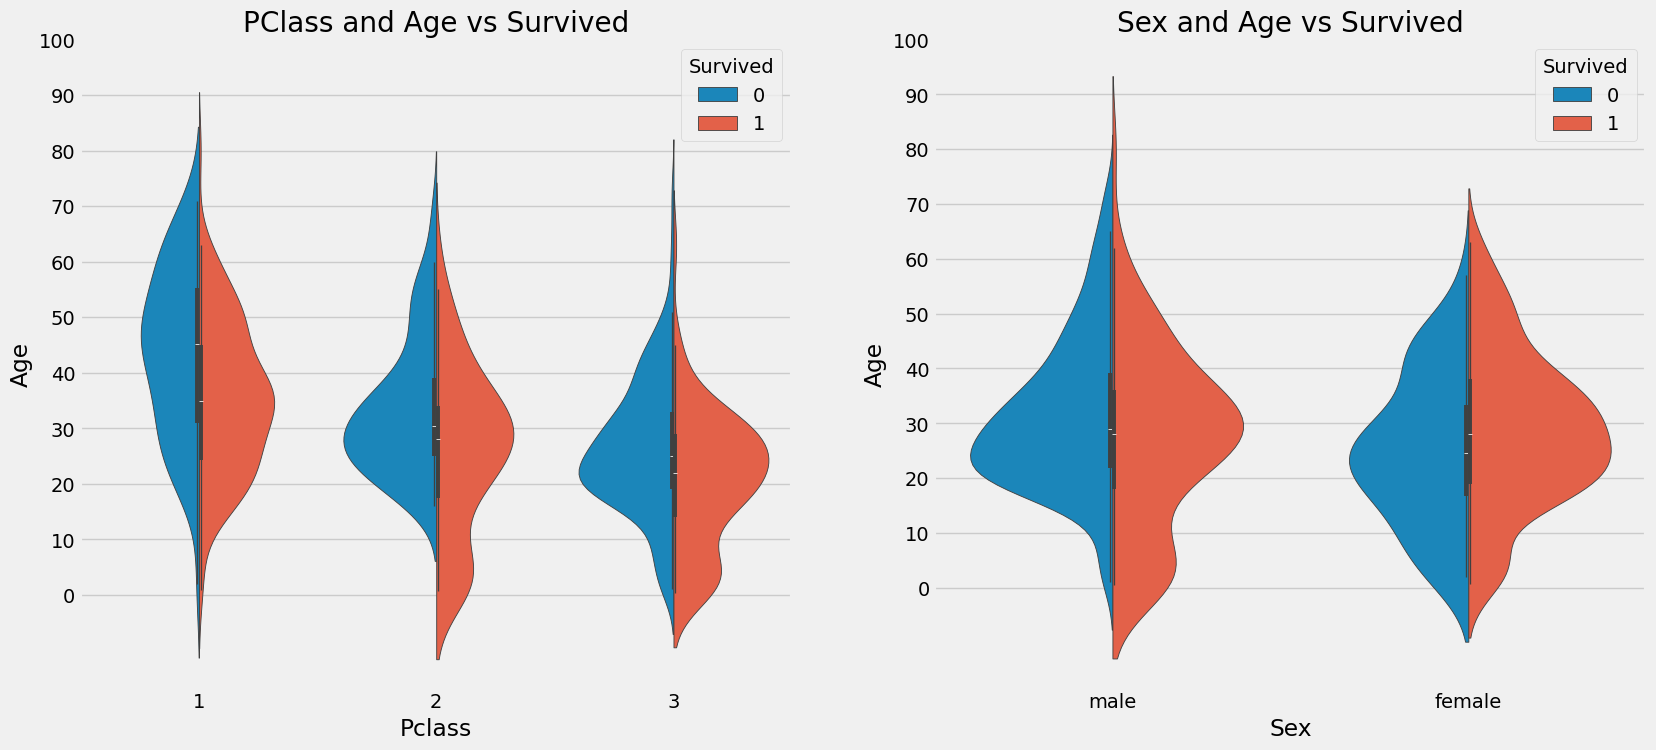

In [96]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = 'Pclass',y = 'Age',hue='Survived',data=df,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


## From above violen plots, following observations are clear,
1. The no of children is increasing from Class 1 to 3, the number of children in Class 3 is greater than other two. <br><br>
2. Survival rate of children, for age 10 and below is good irrespective of Class <br><br>
3. Survival rate between age 20-30 is well and is quite better for women. <br><br>

#### Now, in Age feature we have 177 null values filled with NaN. We have to deal with it. But we can't enter mean of age in every NaN column, because our average/mean is 29 and we cannot put 29 for a child or some olde man. So we have to discover something better. 
### Let's do something more interesting with dataset by exploring more.

### What is, if I look at 'Name' feature, It looks interesting. Let's check it....

In [97]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [98]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are many names which are not relevant like Mr, Mrs etc. So I will replace them with some relevant names,

In [99]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [100]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [101]:
df.sample(2,random_state=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S,Mr
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S,Mrs


In [102]:
df.loc[(df.Age.isnull()) & (df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull()) & (df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull()) & (df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull()) & (df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull()) & (df.Initial=='Other'),'Age']=46

In [103]:
df.Age.isnull().any()


False

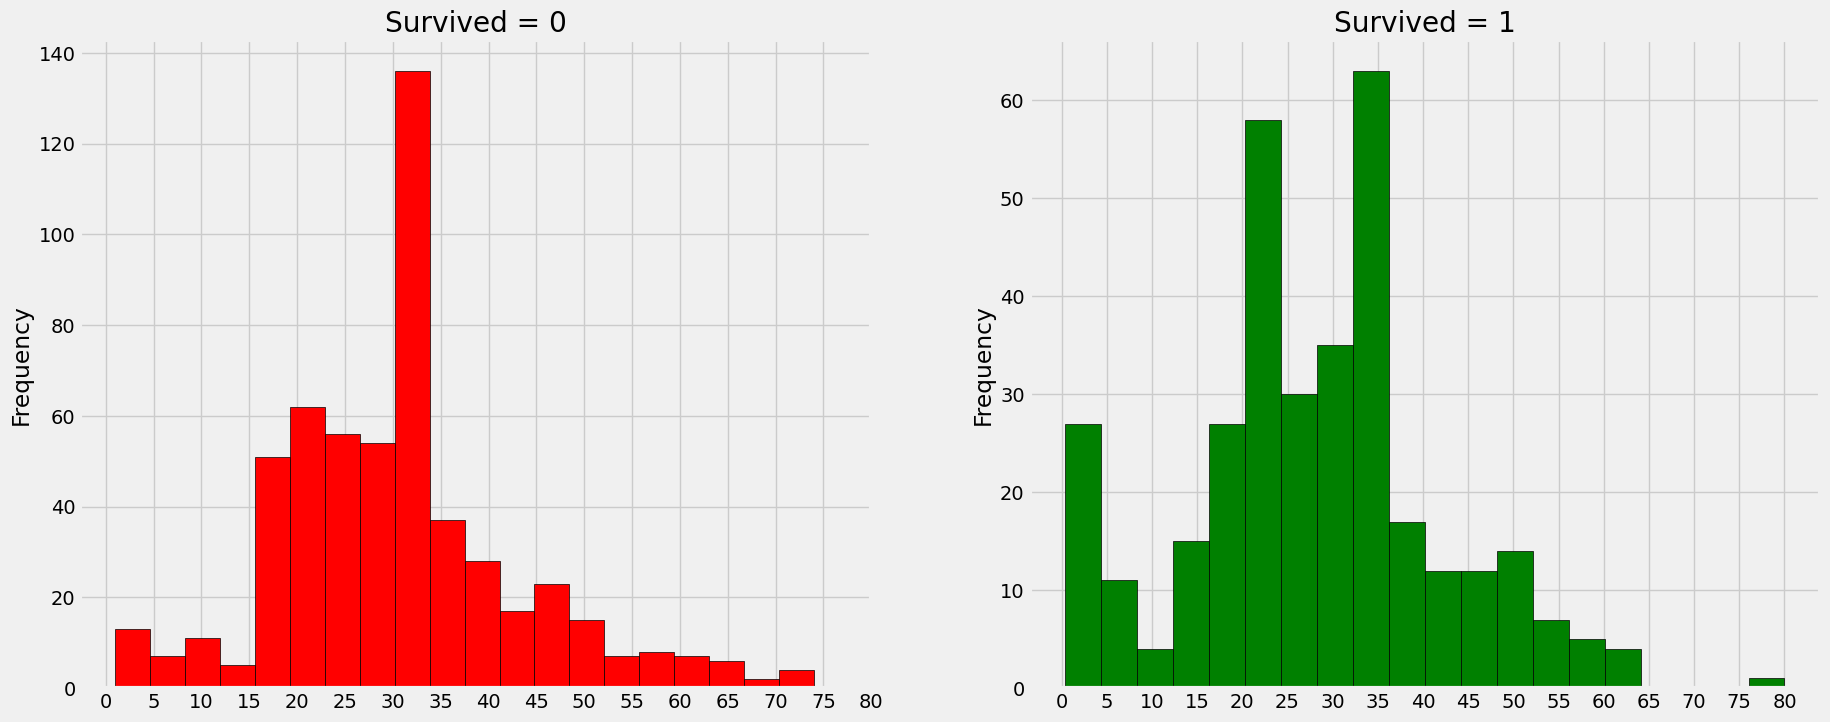

In [104]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()


## From the above plots, I found the following observations


1. First priority during Rescue is given to children and women, as the persons<5 are save by large numbers<br><br>
2. The oldest saved passanger is of 80<br><br>
3. The most deaths were between 30-40<br><br>

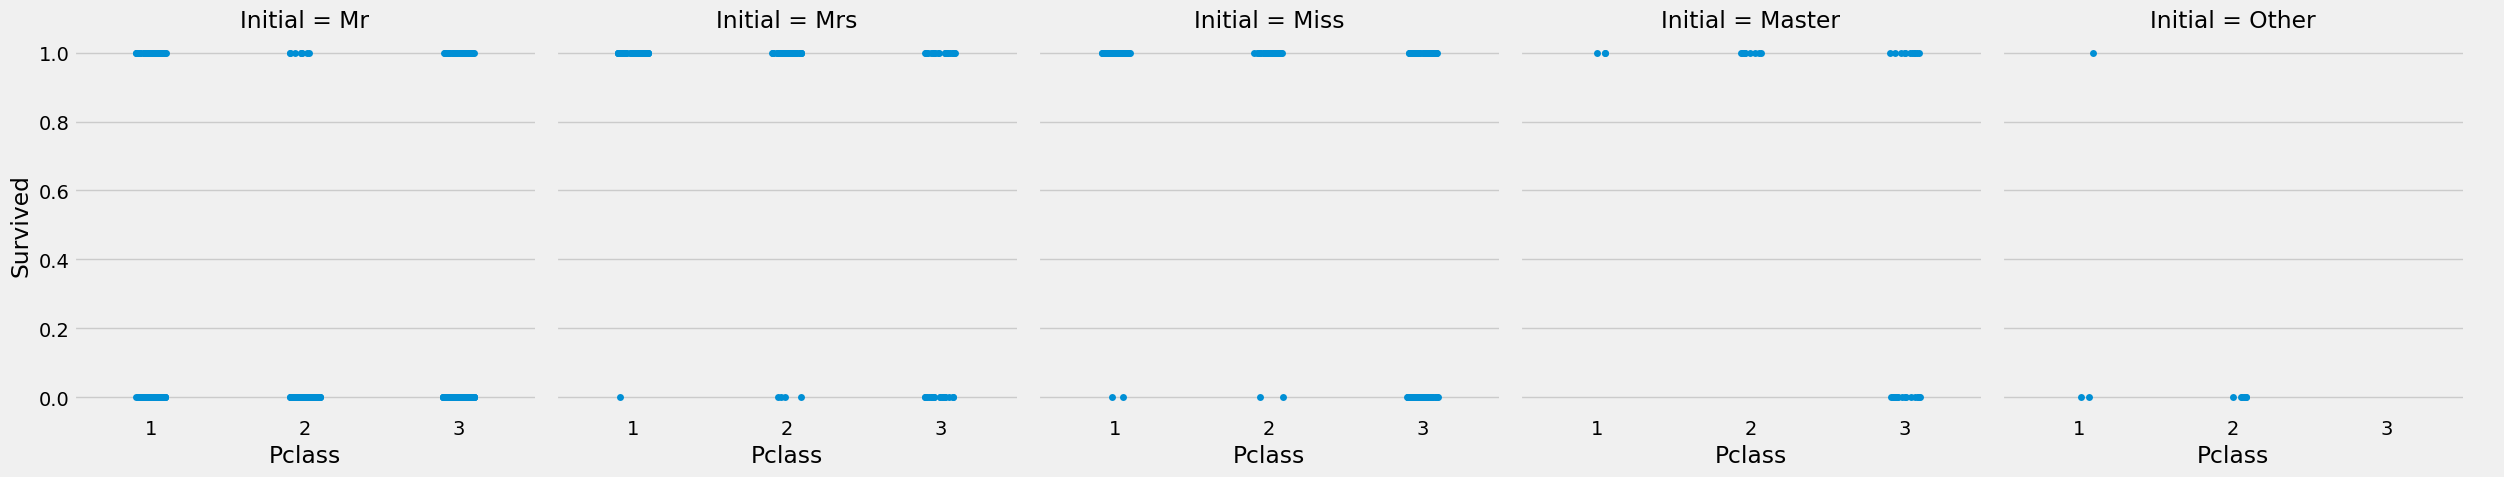

In [105]:
sns.catplot(x= 'Pclass',y='Survived',col='Initial',data=df) #catplot---- kind='point
plt.show()


From the above FactorPlots it is Clearly seen that women and children were saved irrespective of PClass

Let's explore some more

# Feature: SibSp

### SibSip feature indicates that whether a person is alone or with his family. Siblings=brother,sister, etc and Spouse= husband,wife

In [106]:
pd.crosstab([df.SibSp],df.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<Axes: xlabel='SibSp', ylabel='Survived'>

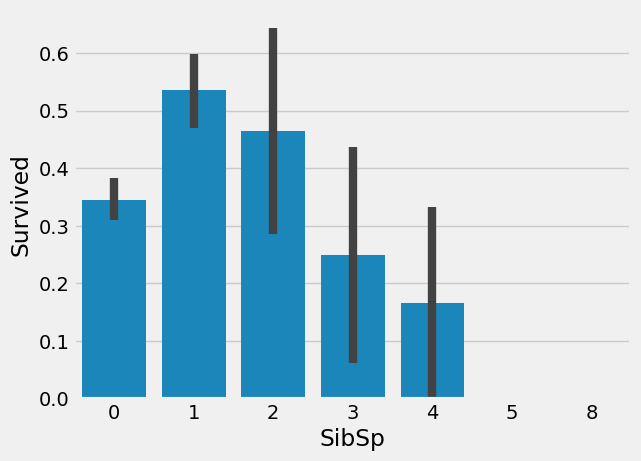

In [107]:
sns.barplot(x="SibSp", y="Survived", data=df)


In [108]:
pd.crosstab(df.SibSp,df.Pclass).style.background_gradient('summer_r')


Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### There are many interesting facts with this feature. Barplot and FactorPlot shows that if a passanger is alone in ship with no siblings, survival rate is 34.5%. The graph decreases as no of siblings increase. This is interesting because, If I have a family onboard, I will save them instead of saving myself. But there's something wrong, the survival rate for families with 5-8 members is 0%. Is this because of PClass?
### Yes this is PClass,  The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

## That are some interesting facts we have observed with Titanic dataset.

# Performing Statistical Modeling

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [110]:
X_Age = df[['Age']].values
y = df['Survived'].values
# Use the fit method to train
model.fit(X_Age,y)
# Make a prediction
y_predict = model.predict(X_Age)
model.score(X_Age,y)

0.6161616161616161

In [111]:
X_Fare = df[['Fare']].values
y = df['Survived'].values
# Use the fit method to train
model.fit(X_Fare,y)
# Make a prediction
y_predict = model.predict(X_Fare)
model.score(X_Fare,y)

0.6655443322109988

In [112]:
X_sex = pd.get_dummies(df['Sex']).values
y = df['Survived'].values
# Use the fit method to train
model.fit(X_sex, y)
# Make a prediction
y_predict = model.predict(X_sex)
model.score(X_sex,y)

0.7867564534231201

In [113]:
X_pclass = pd.get_dummies(df['Pclass']).values
y = df['Survived'].values
# model = LogisticRegression()
model.fit(X_pclass, y)
# Make a prediction
y_predict = model.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.6790123456790124

In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [115]:
df["Sex"] = pd.get_dummies(df.Sex, drop_first=True, dtype=int)
# df = df.drop("Pclass", axis=1).join(
#     pd.get_dummies(df.Pclass, dtype=int, prefix="pclass")
# )
# df = df.drop("Embarked", axis=1).join(
#     pd.get_dummies(df.Embarked, dtype=int, prefix="embarked")
# )

In [116]:
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
443,444,1,2,"Reynaldo, Ms. Encarnacion",0,28.0,0,0,230434,13.0000,NaN,S,Miss
818,819,0,3,"Holm, Mr. John Fredrik Alexander",1,43.0,0,0,C 7075,6.4500,NaN,S,Mr
361,362,0,2,"del Carlo, Mr. Sebastiano",1,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C,Mr
278,279,0,3,"Rice, Master. Eric",1,7.0,4,1,382652,29.1250,NaN,Q,Master
21,22,1,2,"Beesley, Mr. Lawrence",1,34.0,0,0,248698,13.0000,D56,S,Mr
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",1,80.0,0,0,27042,30.0000,A23,S,Mr


In [117]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression

In [123]:
X = df.drop(
    columns=[
        "PassengerId",
        "Pclass",
        "Embarked",
        "Name",
        "Ticket",
        "Cabin",
        "Survived",
        "Initial",
    ]
)
y = df["Survived"].values

In [124]:
X.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [125]:
X

,Sex,Age,SibSp,Parch,Fare
0,1,22.0,1,0,7.2500
1,0,38.0,1,0,71.2833
2,0,26.0,0,0,7.9250
3,0,35.0,1,0,53.1000
4,1,35.0,0,0,8.0500
...,...,...,...,...,...
886,1,27.0,0,0,13.0000
887,0,19.0,0,0,30.0000
888,0,22.0,1,2,23.4500
889,1,26.0,0,0,30.0000


In [126]:
model = RandomForestClassifier()
# model = LogisticRegression()
model.fit(X, y)
# Make a prediction
y_predict = model.predict(X)
print(model.score(X,y))


0.9820426487093153


### Saving the model

In [127]:
import pickle
# Save model to pickle file
with open("models/titanic_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [64]:
def load_model():
    with open("models/titanic_model.pkl", "rb") as f:
        return pickle.load(f)

In [63]:
model = load_model()
model.predict([[]])

RandomForestClassifier()